# ex-01 Simple Perceptron: Implement a Perceptron for binary classification tasks. Visualize the decision boundary and train the model using gradient descent.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dataset
X = np.array([
    [2,7],[3,6],[4,6],[2,8],[8,10],[9,10],[12,13],[3,7],
    [7,3],[8,2],[9,3],[6,4],[5,5],[7,2],[8,3],[9,2],[13,12]
])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1])

In [ ]:
# Perceptron Training
w = np.zeros(2)
b = 0
lr = 0.1
epochs = 20

def step(z): return 1 if z>=0 else 0

for _ in range(epochs):
    for i in range(len(X)):
        y_pred = step(np.dot(X[i],w)+b)
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

print("Weights:",w,"\nBias:",b)


Weights: [ 2.7 -2.6] 
Bias: 0.4


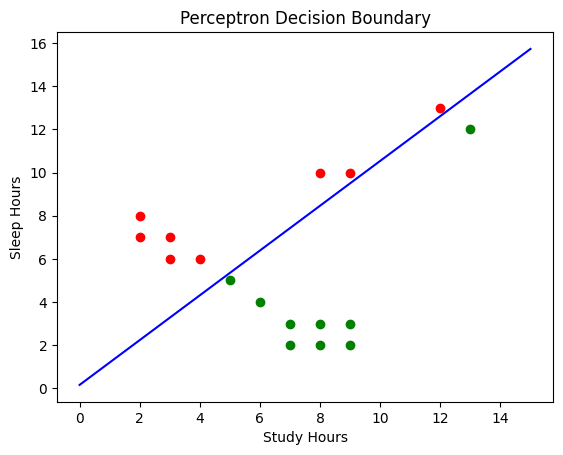

In [ ]:
# Plot decision boundary
for i in range(len(X)):
    plt.scatter(X[i][0],X[i][1],c='green' if y[i]==1 else 'red')

x1 = np.linspace(0,15,100)
x2 = -(w[0]*x1 + b)/w[1]
plt.plot(x1,x2,'blue')
plt.xlabel("Study Hours"); plt.ylabel("Sleep Hours")
plt.title("Perceptron Decision Boundary")
plt.show()

In [ ]:
# Test
test = np.array([[11,11],[9,2]])
pred = [step(np.dot(t,w)+b) for t in test]
print("Predictions:",pred)

Predictions: [1, 1]


#ex-02 Feedforward Neural Network: Build a basic Feedforward Neural Network (FNN) with one hidden layer for classification tasks (e.g., Iris dataset).

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/Iris.csv')

X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [ ]:
y = data.iloc[:,5].values
le = LabelEncoder()
y = le.fit_transform(y)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([

    keras.layers.Dense(6, activation='relu', input_shape=(4,)),  # Hidden Layer

    keras.layers.Dense(3, activation='softmax')                  # Output Layer

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.1576 - loss: 1.6621 - val_accuracy: 0.2083 - val_loss: 1.3786
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1849 - loss: 1.4950 - val_accuracy: 0.2083 - val_loss: 1.3665
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1185 - loss: 1.5338 - val_accuracy: 0.2083 - val_loss: 1.3540
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1068 - loss: 1.5458 - val_accuracy: 0.1667 - val_loss: 1.3415
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1224 - loss: 1.4979 - val_accuracy: 0.0833 - val_loss: 1.3291
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1536 - loss: 1.4883 - val_accuracy: 0.0833 - val_loss: 1.3169
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1211 - loss: 1.4859 - val_accuracy: 0.0833 - val_loss: 1.3049
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1003 - loss: 1.4810 - val_accuracy: 0.0417 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8667 - loss: 0.5444
Test Accuracy: 0.8666666746139526


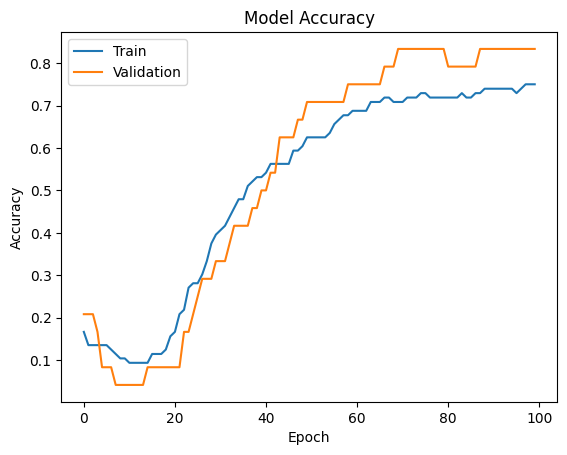

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

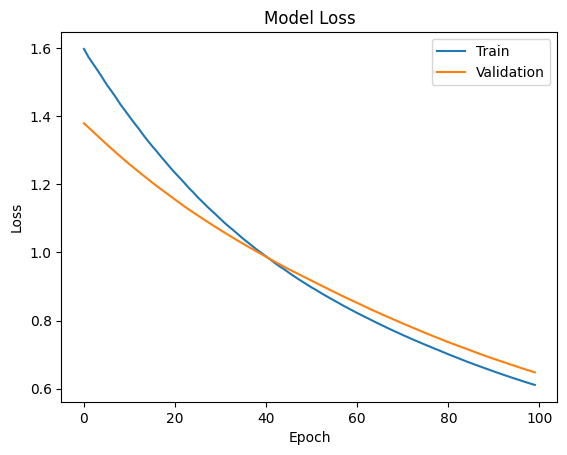

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

#Ex-03 Backpropagation: Implement the backpropagation algorithm in a neural network to update weights based on the error gradient.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/Iris.csv')

X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

# One Hot Encoding
y_onehot = np.zeros((y.size, y.max()+1))
y_onehot[np.arange(y.size), y] = 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_neurons = 4
hidden_neurons = 6
output_neurons = 3

learning_rate = 0.01
epochs = 500

In [ ]:
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
losses = []

for i in range(epochs):

    # ---------- Forward Propagation ----------
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    # ---------- Loss ----------
    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-8), axis=1))
    losses.append(loss)

    # ---------- Backpropagation ----------

    # Output Layer Error
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]

    # Hidden Layer Error
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]

    # ---------- Update Weights ----------
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [ ]:
z1 = np.dot(X_test, W1) + b1
a1 = relu(z1)

z2 = np.dot(a1, W2) + b2
a2 = softmax(z2)

predictions = np.argmax(a2, axis=1)
actual = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions == actual)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9333333333333333


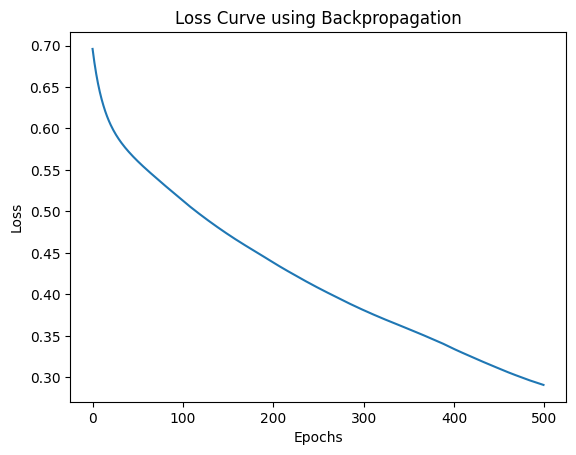

In [ ]:
plt.plot(losses)
plt.title("Loss Curve using Backpropagation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#Ex-04 Multi-Layer Perceptron (MLP): Create an MLP with multiple hidden layers and train it on a classification task like digit recognition (MNIST dataset).

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

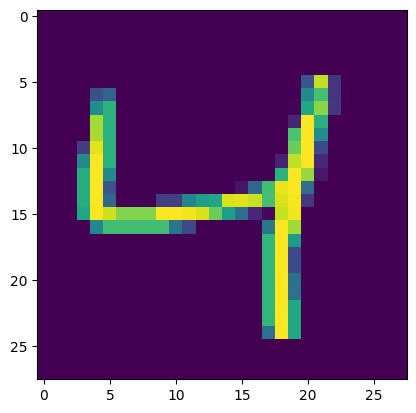

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4874 - loss: 4.0179 - val_accuracy: 0.6973 - val_loss: 0.9934
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7140 - loss: 0.9181 - val_accuracy: 0.8368 - val_loss: 0.6237
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8578 - loss: 0.5446 - val_accuracy: 0.9062 - val_loss: 0.3912
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9143 - loss: 0.3492 - val_accuracy: 0.9284 - val_loss: 0.2820
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9420 - loss: 0.2315 - val_accuracy: 0.9497 - val_loss: 0.2205
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9565 - loss: 0.1758 - val_accuracy: 0.9552 - val_loss: 0.1841
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9624 - loss: 0.1495 - val_accuracy: 0.9481 - val_loss: 0.2252
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9669 - loss: 0.1299 - 

In [ ]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9658

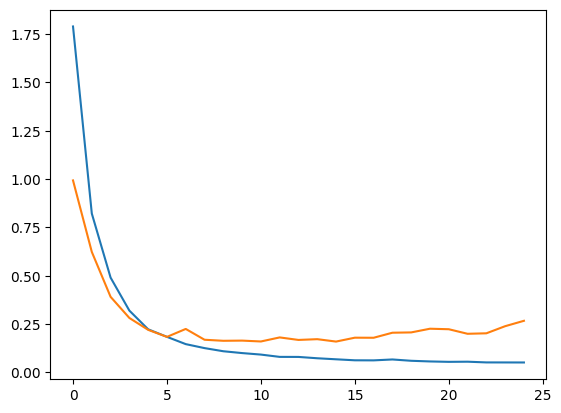

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

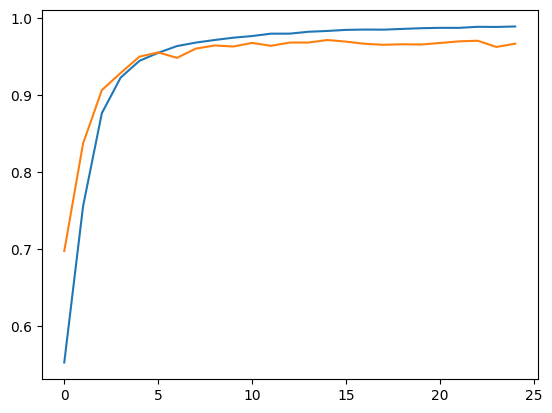

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

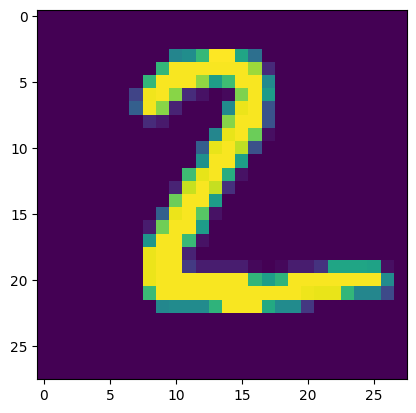

In [ ]:
plt.imshow(x_test[1])

In [ ]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([2])

#Ex-05 Activation Functions: Experiment with different activation functions such as Sigmoid, ReLU, and Tanh. Visualize their effects on learning and decision boundaries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return (x>0).astype(float)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [ ]:
def train_nn(activation, derivative):

    W1 = np.random.randn(2,6)
    b1 = np.zeros((1,6))
    W2 = np.random.randn(6,1)
    b2 = np.zeros((1,1))

    lr = 0.01
    epochs = 500
    losses = []

    for i in range(epochs):

        z1 = np.dot(X_train,W1)+b1
        a1 = activation(z1)

        z2 = np.dot(a1,W2)+b2
        a2 = sigmoid(z2)

        loss = np.mean((a2-y_train)**2)
        losses.append(loss)

        dz2 = (a2-y_train)
        dW2 = np.dot(a1.T,dz2)
        db2 = np.sum(dz2,axis=0)

        da1 = np.dot(dz2,W2.T)
        dz1 = da1*derivative(z1)
        dW1 = np.dot(X_train.T,dz1)
        db1 = np.sum(dz1,axis=0)

        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

    return W1,b1,W2,b2,losses

In [ ]:
W1s,b1s,W2s,b2s,loss_sigmoid = train_nn(sigmoid,sigmoid_derivative)
W1r,b1r,W2r,b2r,loss_relu = train_nn(relu,relu_derivative)
W1t,b1t,W2t,b2t,loss_tanh = train_nn(tanh,tanh_derivative)

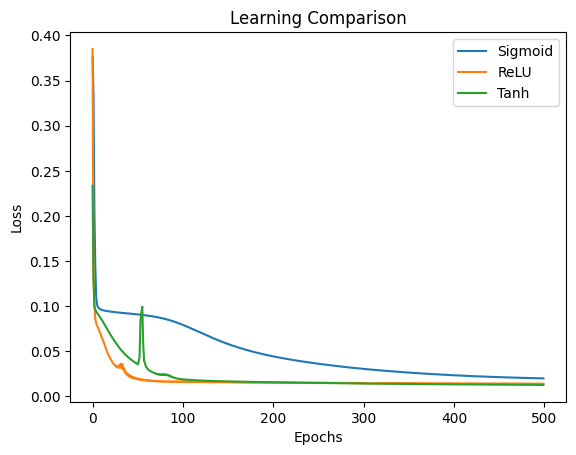

In [ ]:
plt.plot(loss_sigmoid,label="Sigmoid")
plt.plot(loss_relu,label="ReLU")
plt.plot(loss_tanh,label="Tanh")

plt.title("Learning Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def plot_boundary(W1,b1,W2,b2,activation,title):

    x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                        np.arange(y_min,y_max,0.01))

    grid = np.c_[xx.ravel(),yy.ravel()]

    z1 = np.dot(grid,W1)+b1
    a1 = activation(z1)
    z2 = np.dot(a1,W2)+b2
    a2 = sigmoid(z2)

    Z = a2.reshape(xx.shape)

    plt.contourf(xx,yy,Z,alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y.flatten())
    plt.title(title)
    plt.show()

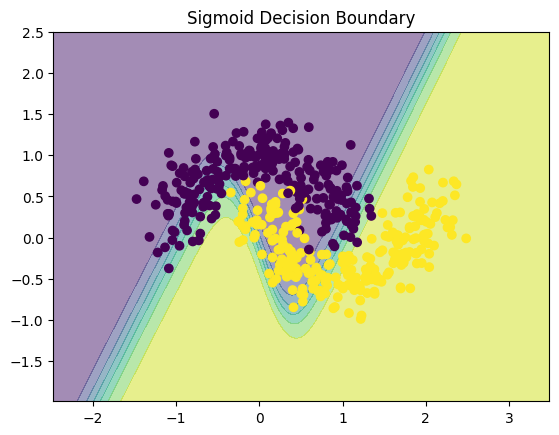

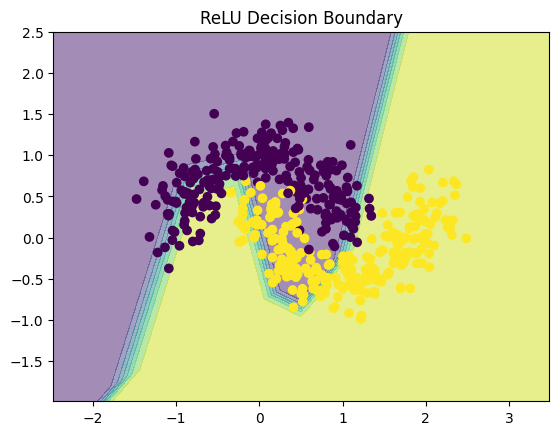

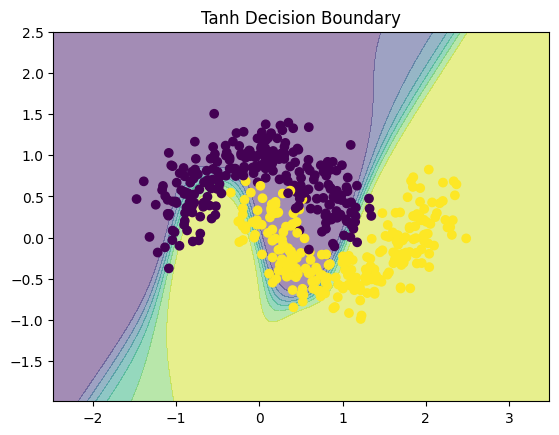

In [ ]:
plot_boundary(W1s,b1s,W2s,b2s,sigmoid,"Sigmoid Decision Boundary")
plot_boundary(W1r,b1r,W2r,b2r,relu,"ReLU Decision Boundary")
plot_boundary(W1t,b1t,W2t,b2t,tanh,"Tanh Decision Boundary")